# Business Case: Aerofit - Descriptive Statistics & Probability

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

## Analysing basic metrics

In [3]:
aerofit=pd.read_csv('aerofit_treadmill.csv')
aerofit

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


## Dataset Characteristics
### Dataset contains following columns:

* **Product Purchased**: KP281, KP481 and KP781, are the 3 different types of treadmills that are purchased by customers<br>
* **Age** : In years, age of the customer who purchased<br>
* **Gender**: Gender of the purchased customer<br>
* **Education**: represented in years<br>
* **Marital Status**: Single or partnered<br>
* **Usage**: The average number of times the customer has planned to use the treadmill each week<br>
* **Fitness**: Self rated fitness of the user rated from 1 (as poor shape) to 5 (as excellent shape)<br>
* **Miles**: The average number of miles the customer expects to walk or run each week<br>
* **Income**: Annual income of the user in Dollars $

In [4]:
aerofit.shape

(180, 9)

In [5]:
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [12]:
aerofit.describe(include='all').T #Descriptive Statistics

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,KP281,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


## Descriptive Analysis

* Total count of all columns is 180
* **Age:** Mean age of the customer is 28 years, half of the customer's mean age is 26.
* **Product** There are 3 unique products in the dataset. **KP281** is the most frequent product.
* **Education:** Mean Education is 15 with maximum as 21 and minimum as 12.
* **Usage:** Mean Usage per week is 3.4, with maximum as 7 and minimum as 2.
* **Fitness:** Average rating is 3.3 on a scale of 1 to 5.
* **Miles:** Average number of miles the customer walks is 103 with maximum distance travelled by most people is almost 115 and minimum is 21.
* **Income (in $):** Most customer earns around 58K annually, with maximum of 104K and minimum almost 30K

## Non-Graphical Analysis: Value counts and unique attributes
### Numerical Summary

In [15]:
aerofit.isnull().sum() #Handling Missing Values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [18]:
aerofit['Product'].unique().tolist()

['KP281', 'KP481', 'KP781']

In [4]:
aerofit['Product'].value_counts().sort_index() # Number of customers with 3 different product types

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [19]:
aerofit['Product'].nunique() #Total number of unique Product ids

3

In [26]:
aerofit['Age'].unique() # list of unique ages

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [24]:
total_uniq_age = aerofit['Age'].nunique() # Total number of unique ages
total_uniq_age

32

In [23]:
aerofit['Gender'].value_counts() # Number of Male and Female customers

Male      104
Female     76
Name: Gender, dtype: int64

In [22]:
# list of unique Educations
aerofit['Education'].unique().tolist()

[14, 15, 12, 13, 16, 18, 20, 21]

In [27]:
aerofit['Fitness'].value_counts().sort_index() # Number of customer againts the rating scale 1 to 5

1     2
2    26
3    97
4    24
5    31
Name: Fitness, dtype: int64

In [6]:
aerofit['Usage'].value_counts().sort_index() # Number of customers counts on Usage

2    33
3    69
4    52
5    17
6     7
7     2
Name: Usage, dtype: int64

In [7]:
aerofit['MaritalStatus'].value_counts() # Number of Single and Partnered customers

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

### Summary
* KP281, KP481, KP781 are the 3 different products
* Most commonly purchased treadmill product type is KP281
* There are 32 unique ages
* 104 Males and 76 Females are in the customers list
* 8 unique set of Educations (14, 15, 12, 13, 16, 18, 20, 21)
* Highest rated Fitness rating is 3
* Most customers usage treadmill atleast 3 days per week
* Majority of the customers who have purchased are Married/Partnered

## Conditional and Marginal Probabilities
### Two-Way Contingency Table

In [4]:
pd.crosstab(index=aerofit['Product'], columns=[aerofit['Gender']],margins=True) 

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


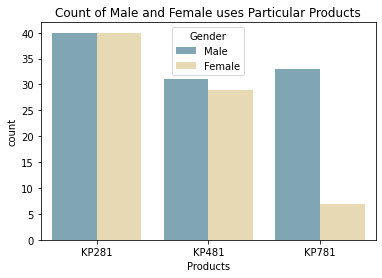

In [15]:
sns.countplot(x = "Product", data= aerofit, hue = "Gender", color='blue;', palette="blend:#7AB,#EDA")
plt.xlabel("Products")
plt.title("Count of Male and Female uses Particular Products")
plt.show()

In [32]:
np.round(((pd.crosstab(aerofit.Product,aerofit.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


### Marginal Probability

* Probability of Male Customer Purchasing any product is : 57.77 %

* Probability of Female Customer Purchasing any product is : 42.22 %

### Marginal Probability of any customer buying

* product KP281 is : 44.44 % (cheapest / entry level product)

* product KP481 is : 33.33 % (intermediate user level product)

* product KP781 is : 22.22 % (Advanced product with ease of use that help in covering longer distance)

### Conditional Probabilities

In [23]:
np.round((pd.crosstab([aerofit.Product],aerofit.Gender,margins=True,normalize="columns"))*100,2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


### Probability of Selling Product

KP281 | Female = 52 %

KP481 | Female = 38 %

KP781 | Female = 10 %

KP281 | male = 38 %

KP481 | male = 30 %

KP781 | male = 32 %

Probability of Female customer buying KP281(52.63%) is more than male(38.46%).

KP281 is more recommended for female customers.

Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

Probability of Female customer buying Product KP481(38.15%) is significantly higher than male (29.80%. )

KP481 product is specifically recommended for Female customers who are intermediate user.

### conversion of categorical attributes to 'category'

In [8]:
df_cat = aerofit
df_cat['Fitness_category'] = aerofit.Fitness
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,4
1,KP281,19,Male,15,Single,2,3,31836,75,3
2,KP281,19,Female,14,Partnered,4,3,30699,66,3
3,KP281,19,Male,12,Single,3,3,32973,85,3
4,KP281,20,Male,13,Partnered,4,2,35247,47,2


In [9]:
df_cat["Fitness_category"].replace({1:"Poor Shape",
                            2:"Bad Shape",
                            3:"Average Shape",
                            4:"Good Shape",
                            5:"Excellent Shape"},inplace=True)
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape


### Categorization of Fitness Rating to following descriptive categories

* Poor Shape
* Bad Shape
* Average Shape
* Good Shape
* Excellent Shape

### Statistical Summary

In [11]:
sr = aerofit['Product'].value_counts(normalize=True)
stat = sr.map(lambda calc: round(100*calc,2))
stat

KP281    44.44
KP481    33.33
KP781    22.22
Name: Product, dtype: float64

* **44.44%** of customers bought **KP281** product type
* **33.33%** of customers bought **KP481** product type
* **22.22%** of customers bought **KP781** product type

In [12]:
gender = aerofit['Gender'].value_counts(normalize=True)
gender_res = gender.map(lambda calc: round(100*calc,2))
gender_res

Male      57.78
Female    42.22
Name: Gender, dtype: float64

**57.78%** of customers are **Male** and **42.22%** customers are **Female**

In [13]:
marital_status = aerofit['MaritalStatus'].value_counts(normalize=True)
marital_status_res = marital_status.map(lambda calc:round(100*calc,2))
marital_status_res

Partnered    59.44
Single       40.56
Name: MaritalStatus, dtype: float64

* **59.44%** of customers are **Married/Partnered**

* **40.56%** of customers are **Single**

In [14]:
# Usage: Number of days used per week (listed in %)
usage = aerofit['Usage'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
usage.rename(columns={'index':'DaysPerWeek'},inplace=True)
usage

,DaysPerWeek,Usage
0,3,38.33
1,4,28.89
2,2,18.33
3,5,9.44
4,6,3.89
5,7,1.11


* **Around 39%** of customers use **3 days per week**
* **Less than 2%** of customers use **7 days per week**

In [15]:
# Customer rating of their fitness (listed in %)
rating = aerofit['Fitness'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
rating.rename(columns={'index':'Rating'},inplace=True)
rating

,Rating,Fitness
0,3,53.89
1,5,17.22
2,2,14.44
3,4,13.33
4,1,1.11


* **More than 53%** of customers have rated themselves as **average in fitness (rated 3)**
* **14%** of customers have rated their fitness **less than average**
* **Over 17%** of customers have **peak fitness ratings**

## Visual Analysis - Univariate & Bivariate
### Univariate Analysis
#### For Continous Variable(s):Distplot, countplot, histogram for univariate analysis

<function matplotlib.pyplot.show(close=None, block=None)>

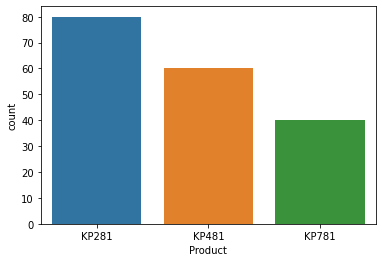

In [16]:
# Product Analysis - count plot
sns.countplot(data=aerofit,x='Product')
plt.show

* **KP281** is the most commonly purchase product type
* **KP481** is the second most top product type purchased
* **KP781** is the least purchased product type

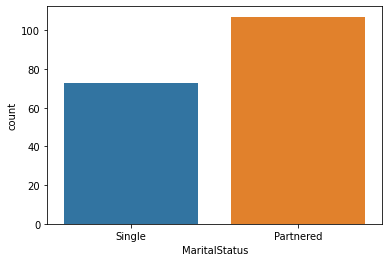

In [17]:
# Marital Status Analysis - Count plot
sns.countplot(data=aerofit,x='MaritalStatus')
plt.show()

* **Most products** purchased by **couples/Married/Partnered** customer category

<function matplotlib.pyplot.show(close=None, block=None)>

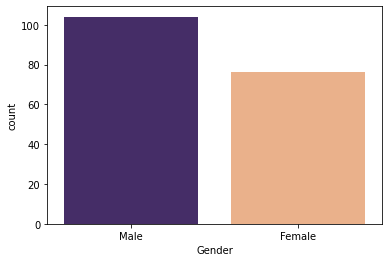

In [18]:
# Gender Analysis - Count Plot
sns.countplot(data=aerofit,x='Gender',palette=['#432371',"#FAAE7B"])
plt.show

* **Most products** purchased by **Males**, females are less interested in the product compared to Males

<function matplotlib.pyplot.show(close=None, block=None)>

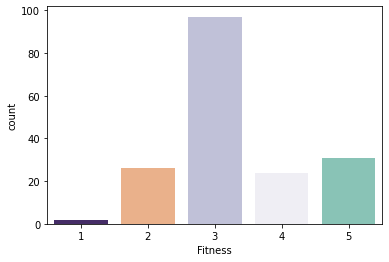

In [19]:
# Fitness rating analysis - count plot
sns.countplot(data=aerofit,x='Fitness',palette=['#432371',"#FAAE7B","#bcbddc", "#efedf5",'#7fcdbb'])
plt.show

* **More than 90 customers** have rated their physical fitness rating as **Average**
* **Excellent shape** is the **second highest** rating provided by the customers

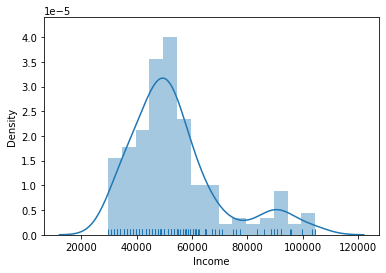

In [20]:
# Income Analysis - Distplot
sns.distplot(aerofit.Income,rug=True)
plt.show()

* **Most of customers** who have purchased the product have a **average income between 40K to 60K**
* **Average Income** density is **over 3.0**

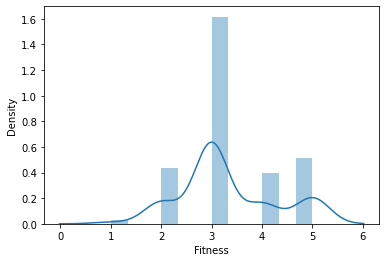

In [21]:
# Fitness Rating Analysis - Distplot
sns.distplot(aerofit.Fitness)
plt.show()

* **Over 1.5 density** customer population have rated their physical fitness rating as **Average**
* **Second highest customer population density** have rated **Excellent shape** as their fitness rating

<AxesSubplot:xlabel='Income', ylabel='Count'>

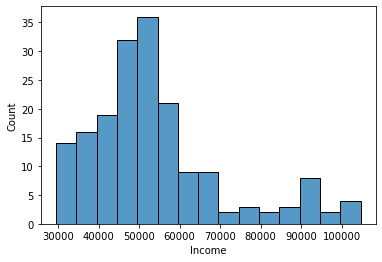

In [22]:
# Income Analysis - Histogram
sns.histplot(data=aerofit,x='Income')

* More than 35 customers earn 50-55K per year
* More than 30 customers earn 45-50K per year
* More than 20 customers earn 55-60K per year

<AxesSubplot:xlabel='Education', ylabel='Count'>

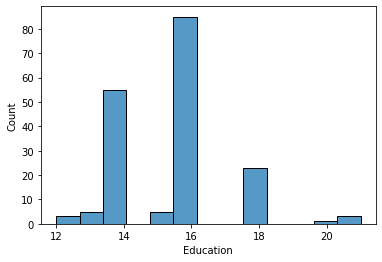

In [23]:
# Education Analysis - Histogram
sns.histplot(data=aerofit,x='Education')

* Highest number of customers have 16 as their Education
* 14 is the second highest education among the customers
* 20 is the least education among the customers

<AxesSubplot:xlabel='Usage', ylabel='Count'>

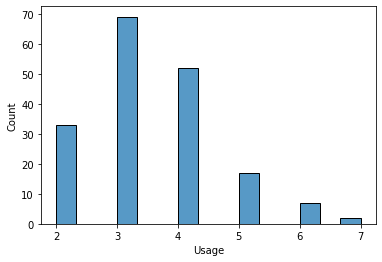

In [24]:
# Usage Analysis - Histogram
sns.histplot(data=aerofit,x='Usage')

* 3 days per week is the most common usage among the customers
* 4 days and 2 days per week is the second and third highest usage among the customers
* Very few customers use product 7 days per week

<AxesSubplot:xlabel='Fitness', ylabel='Count'>

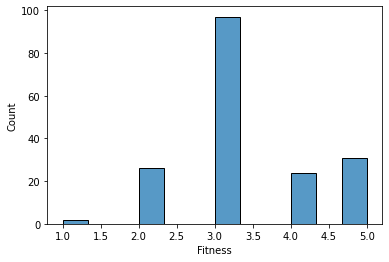

In [25]:
# Fitness Analysis - Histogram
sns.histplot(data=aerofit,x='Fitness')

* Average shape is the most rating customers have given for fitness rating
* Around 40 customers have stated Excelled Shape as fitness rating

#### For categorical variable(s): Boxplot

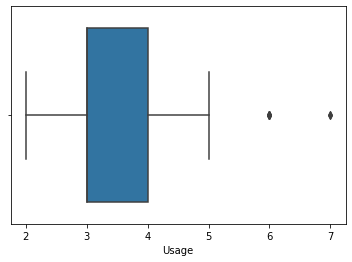

In [26]:
# Usage Analysis - Box plot
sns.boxplot(data=aerofit,x='Usage')
plt.show()

* 3 to 4 days is the most preferred usage days for customers
* 6 and 7 days per week is roughly the usage days for few customers (Outliers)

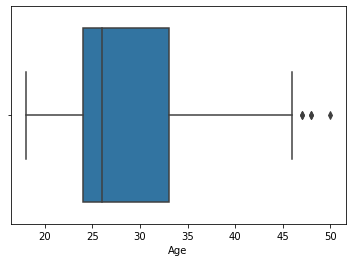

In [27]:
# Age Analysis - Box plot
sns.boxplot(data=aerofit,x='Age')
plt.show()

* 23 to 34 is the most common customer age group that has purchased the product
* Above 45 years old customers are very few compared to the young age group given in the dataset

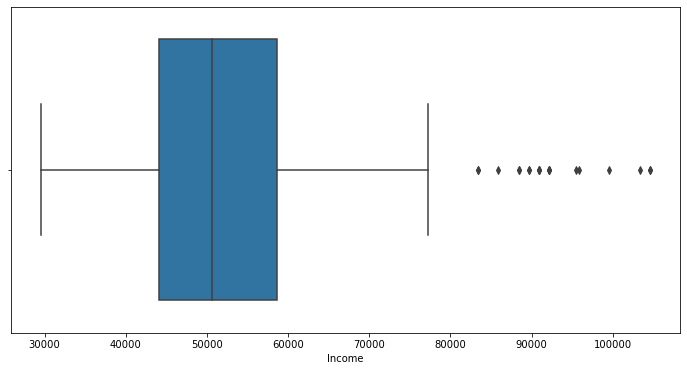

In [28]:
# Income Analysis - Box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=aerofit,x='Income')
plt.show()

* Few customers have income above 80K per annum(Outliers)
* Most customers earn from 45K to around 60K per annum

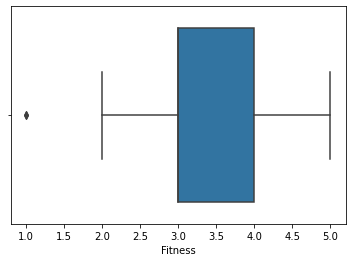

In [29]:
# Fitness Rating Analysis - Box plot
sns.boxplot(data=aerofit,x='Fitness')
plt.show()

* Couple of customers have rated their fitness rating as 1 - Poor Shape
* Most customers have rated fitness rating as 3.0 to 4.0

#### For correlation: Heatmaps, Pairplots

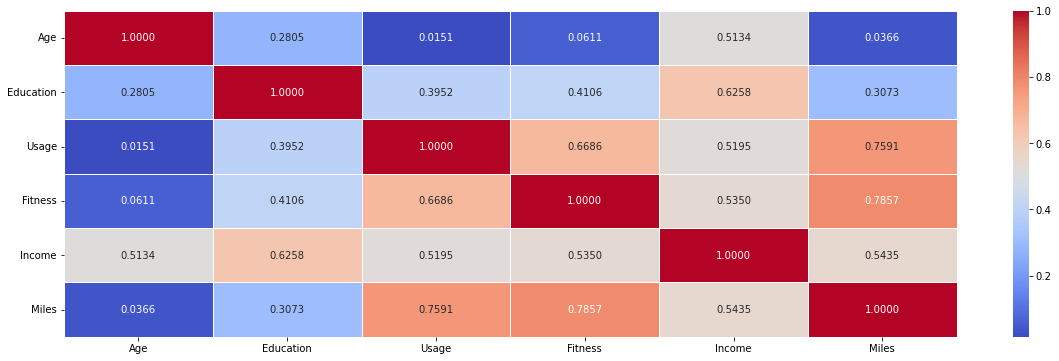

In [34]:
#Correlation HeatMap
plt.figure(figsize=(20,6))
ax = sns.heatmap(aerofit.corr(),annot=True,fmt='.4f',linewidths=.5,cmap='coolwarm')
plt.yticks(rotation=0)
plt.show()

In the above heatmap linear relationship between data points is evaluated

* Correlation between Age and Miles is 0.03
* Correlation between Education and Income is 0.62
* Correlation between Usage and Fitness is 0.66
* Correlation between Fitness and Age is 0.06
* Correlation between Income and Usage is 0.51
* Correlation between Miles and Age is 0.03

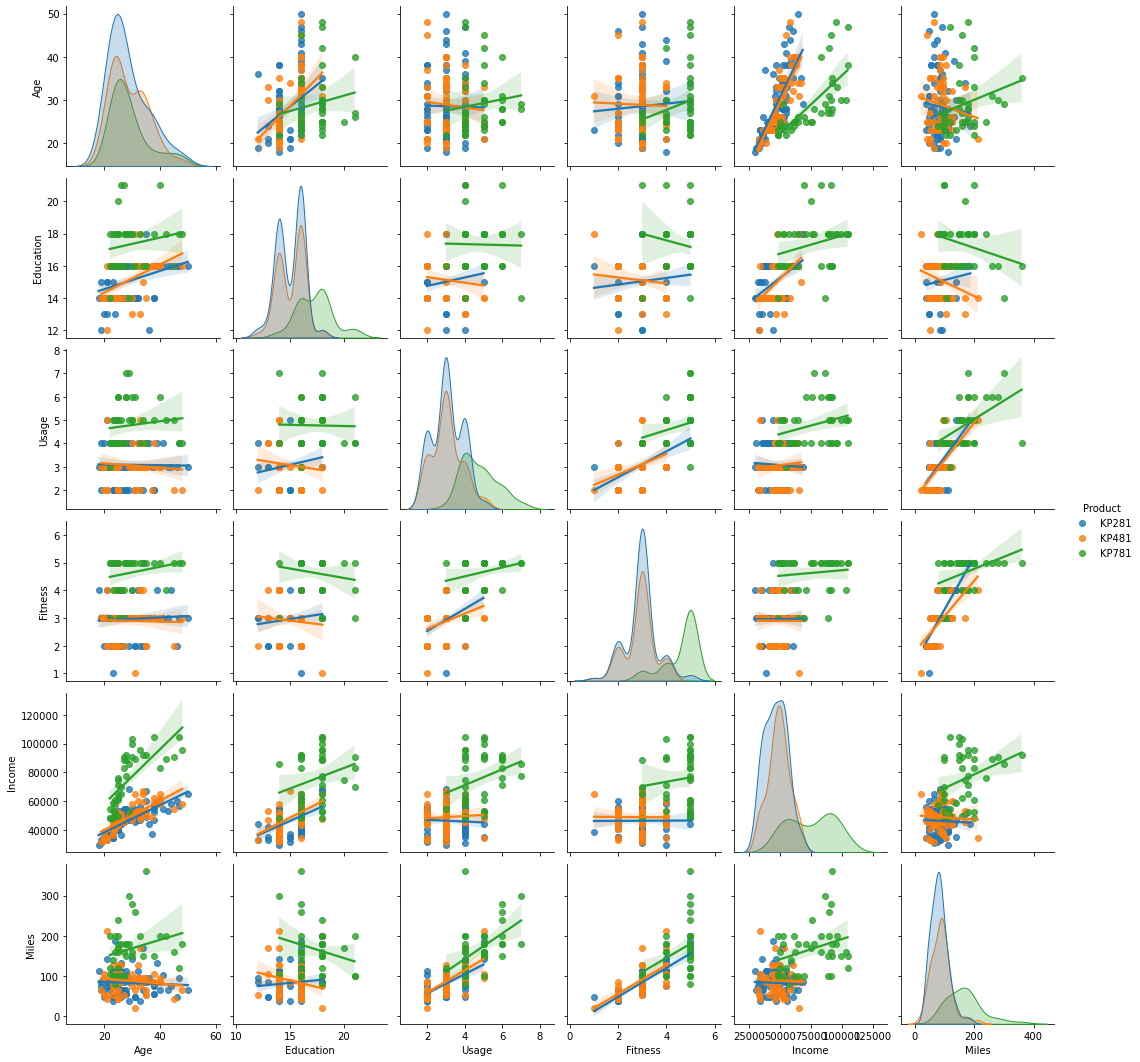

In [33]:
# Product Analysis - Pair Plot
sns.pairplot(aerofit,hue='Product',kind='reg')
plt.show()

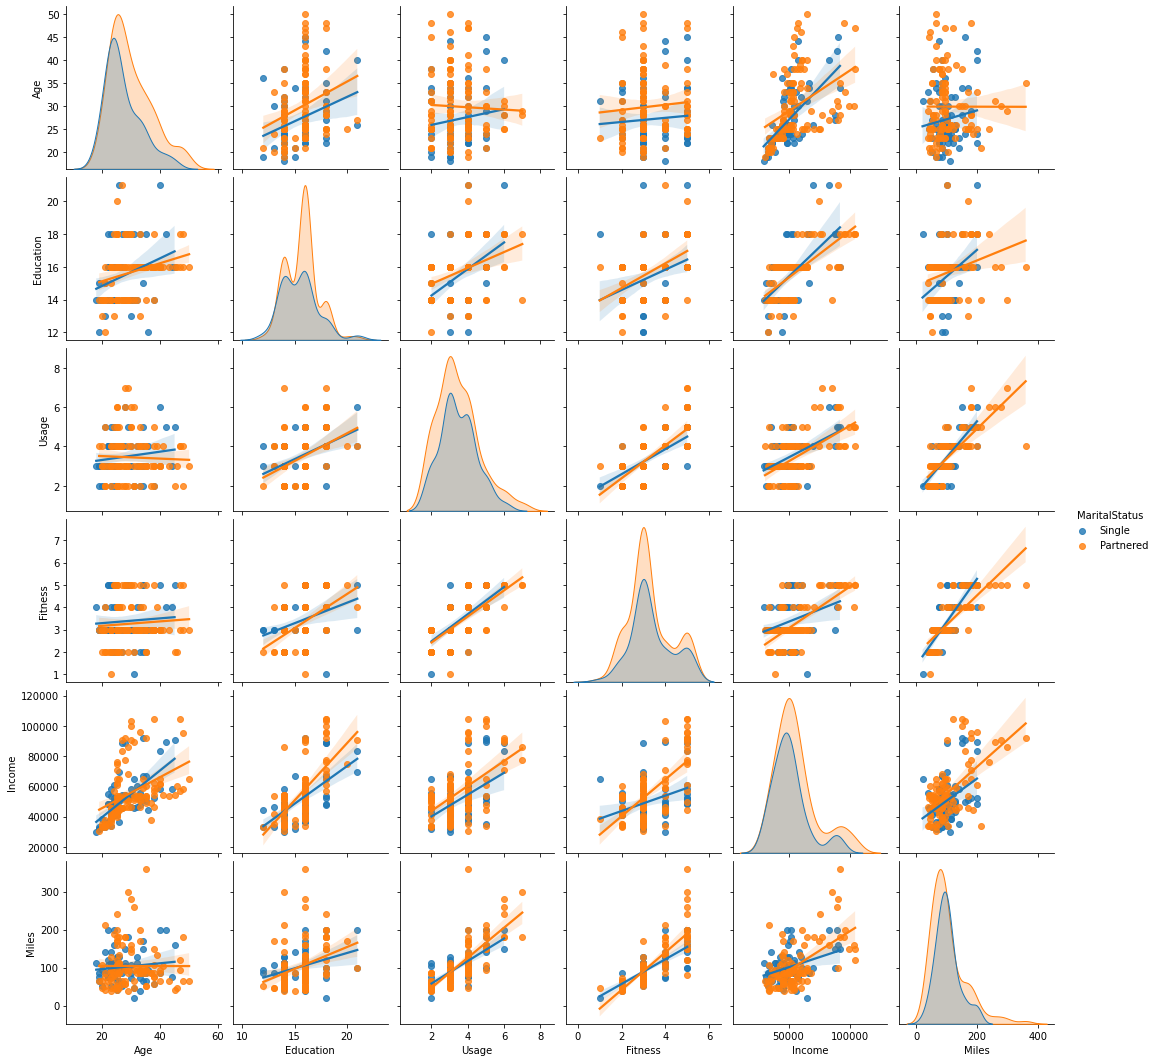

In [35]:
# Marital Status - pair plot
sns.pairplot(aerofit,hue='MaritalStatus',kind='reg')
plt.show()

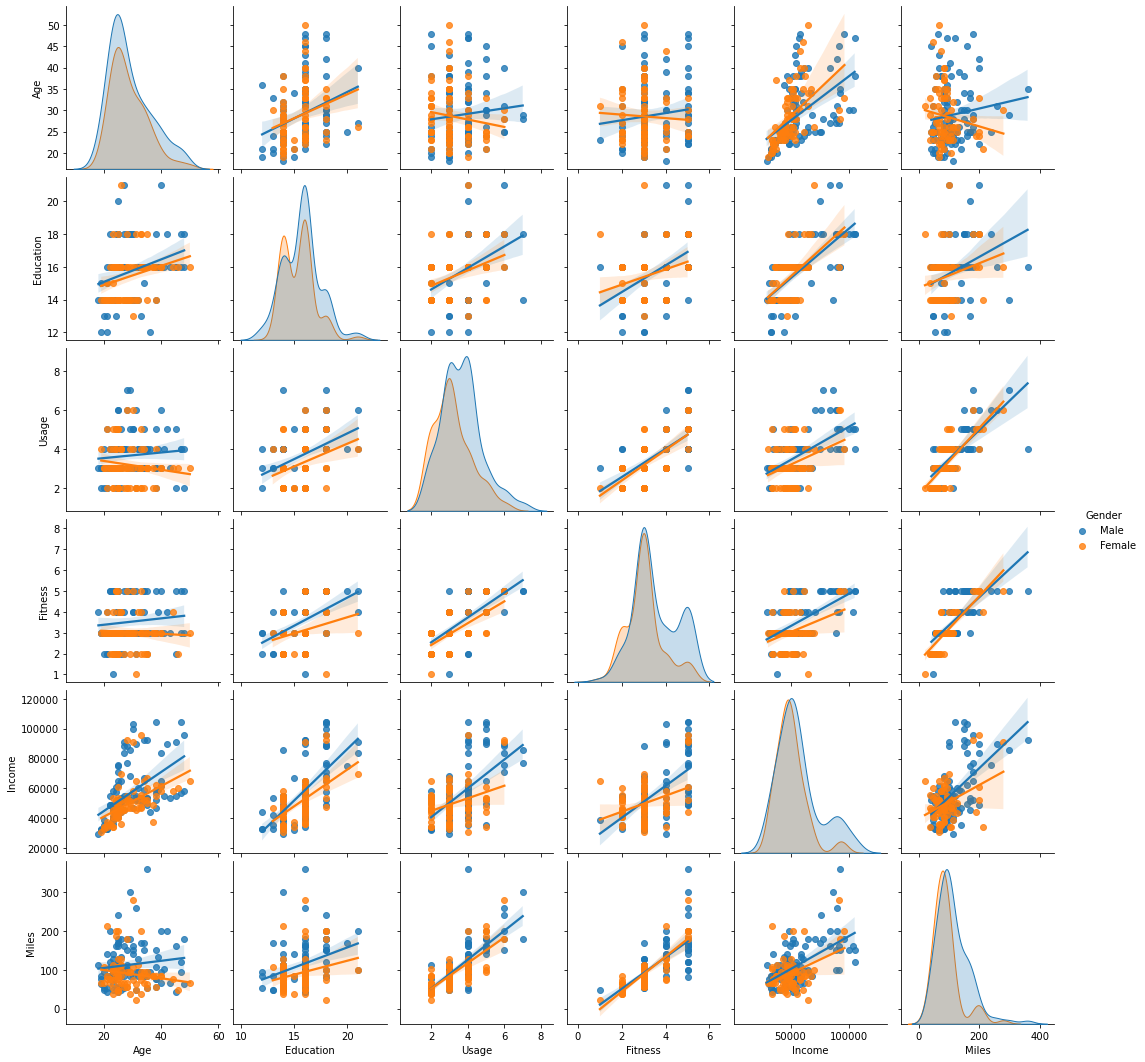

In [36]:
# Gender Analysis - Pair Plot
sns.pairplot(aerofit,hue='Gender',kind='reg')
plt.show()

### Bivariate Analysis

In [37]:
# Average usage of each product type by the customer
aerofit.groupby('Product')['Usage'].mean()

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

* Mean usage for product KP281 is 3.08
* Mean usage for product KP481 is 3.06
* Mean usage for product KP781 is 4.77

In [38]:
# Average Age of customer using each product
aerofit.groupby('Product')['Age'].mean()

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

* Mean Age of the customer who purchased product KP281 is 28.55
* Mean Age of the customer who purchased product KP481 is 28.90
* Mean Age of the customer who purchased product KP781 is 29.10

In [39]:
# Average Education of customer using each product
aerofit.groupby('Product')['Education'].mean()

Product
KP281    15.037500
KP481    15.116667
KP781    17.325000
Name: Education, dtype: float64

* **Mean Education qualification** of the customer who purchased product **KP281 is 15.03**
* **Mean Education qualification** of the customer who purchased product **KP481 is 15.11**
* **Mean Education qualification** of the customer who purchased product **KP781 is 17.32**

In [40]:
# Average customer fitness rating for each product type purchased
aerofit.groupby('Product')['Fitness'].mean()

Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64

* Customer fitness mean for product KP281 is 2.96
* Customer fitness mean for product KP481 is 2.90
* Customer fitness mean for product KP781 is 4.62

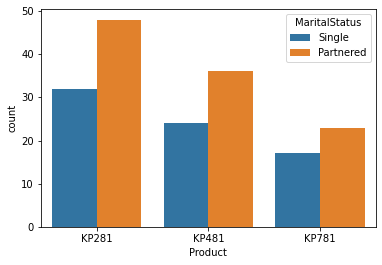

In [41]:
# Product purchased among Married/Partnered and Single
sns.countplot(data=aerofit,x='Product',hue='MaritalStatus')
plt.show()

From the above countplot:

* KP281 is the **most preferred** product among customers
* **KP481** is the **second most preferred** product among the customers
* Between Singles and Partnered, **Partnered customers** are the **major product purchasers**

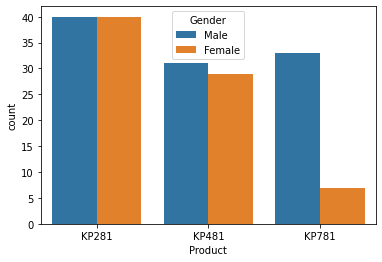

In [42]:
# Product purchased among Male and Female
sns.countplot(data=aerofit,x='Product',hue='Gender')
plt.show()

* **KP281** Product is the **equally preferred** by both **male and female genders**
* **KP781** Product is **mostly preferred** among the **Male customers**
* **Overall Male customers are the highest product purchasers**

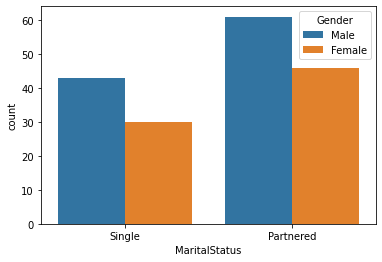

In [43]:
# Count among Gender and their Marital Status
sns.countplot(data=aerofit,x='MaritalStatus',hue='Gender')
plt.show()

* Partnered customers are the most buyers of aerofit product
* Out of both Single and Partnered customers, Male customers are significantly high
* Female customers are considerably low compared to Male customers

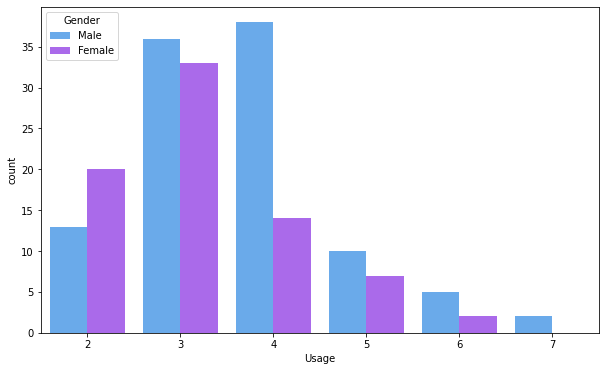

In [44]:
# Purchased product usage among Gender
plt.figure(figsize=(10,6))
sns.countplot(data=aerofit,x='Usage',hue='Gender',palette='cool')
plt.show()

* Among Male and Female genders, Male's usage is 4 days per week
* Female customers mostly use 3 days per week
* Only few Male customers use 7 days per week whereas female customer's maximum usage is only 6 days per week

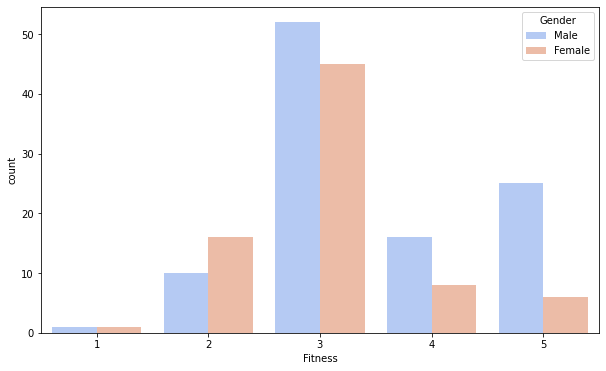

In [45]:
# Fitness rating among the customers categorised by Gender
plt.figure(figsize=(10,6))
sns.countplot(data=aerofit,x='Fitness',hue='Gender',palette='coolwarm')
plt.show()

* Among the fitness rating both Male and Female most have rated as average
* Significant number of Male customers are at Excellent shape compared to Female customers

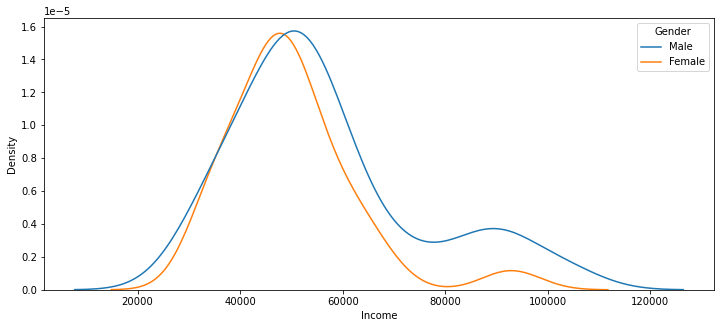

In [46]:
# Product purchased Customers Income and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=aerofit,x='Income',hue='Gender')
plt.show()

From the above diagram, we can conclude the spike from 40K to around 80K is the most common income per annum of the customers

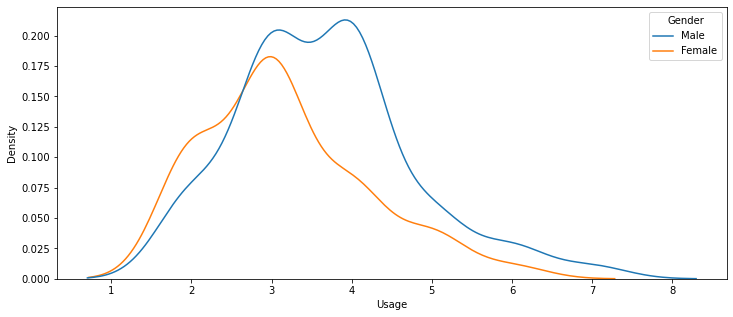

In [47]:
# Product purchased Customers Usage per week and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=aerofit,x='Usage',hue='Gender')
plt.show()

* Male customers usage is significantly higher the female customer
* Female customer's lack consistency after the 3 days per week

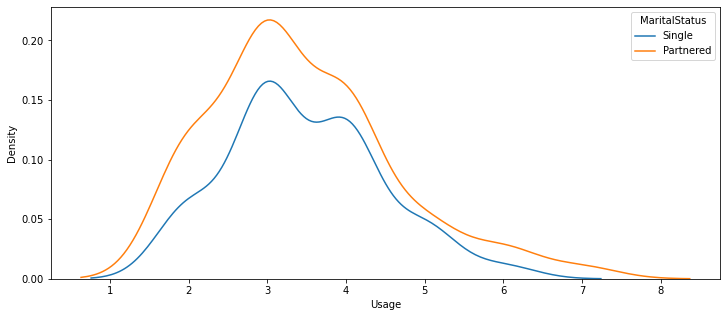

In [48]:
# Product purchased Customers Usage per week and their Marital Status
plt.figure(figsize=(12,5))
sns.kdeplot(data=aerofit,x='Usage',hue='MaritalStatus')
plt.show()

* Partnered customers usage is higher than single customers
* Partnered customers also have greater consistency per week of 7 days per week than single customers

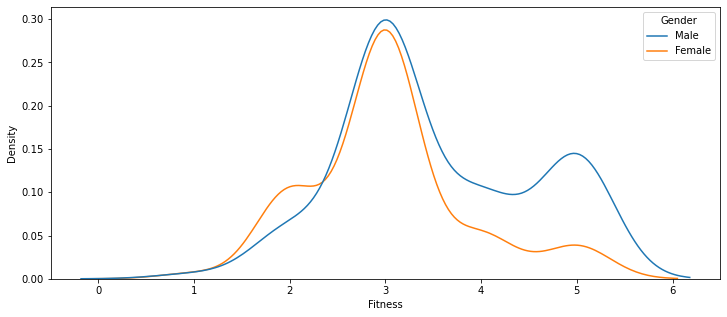

In [49]:
# Product purchased Customers Fitness Rating and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=aerofit,x='Fitness',hue='Gender')
plt.show()

* Male customers are in better shape the female customers
* Though Female customers do not have poor shape, they are also not in excellent shape
* Some Male customers excellent body shape and few customers have poor shape as well

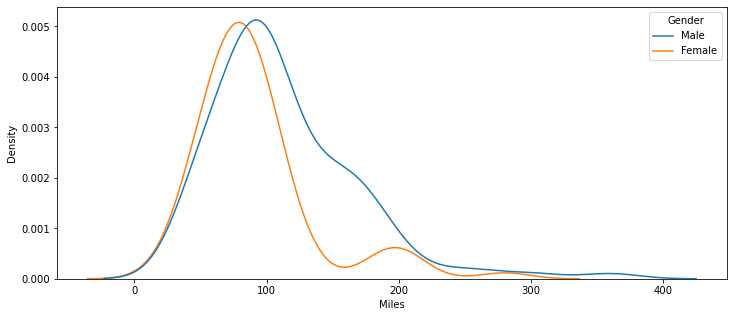

In [50]:
# Distance covered by each Gender among the customers
plt.figure(figsize=(12,5))
sns.kdeplot(data=aerofit,x='Miles',hue='Gender')
plt.show()

* Male customers have a consistent distance coverage than female customers
* Female customers have max distance covered as just over 300 miles

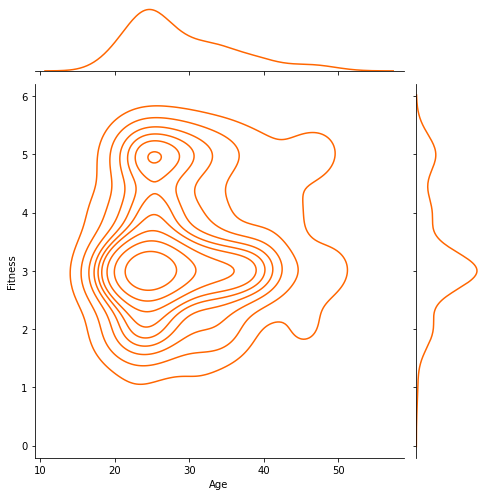

In [51]:
# Joint Histogram with KDE plot
sns.jointplot(x="Age", y="Fitness", data=aerofit,height = 7,kind="kde",color="#FF6600")
plt.show()

* Majority of the customer Age group is between 20 to mid 30s who have rated atleast average

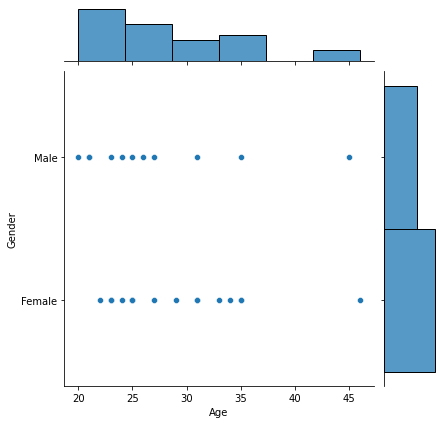

In [52]:
# Scatterplot for customers Gender and Age who rated less than 2 in Fitness rating
sns.jointplot(x='Age',y='Gender',data=aerofit[aerofit.Fitness<3])
plt.show()

* Above Joint plot describes the relationship between the customer age and their gender grouping.
* Product is not familiar with older or middle age womens

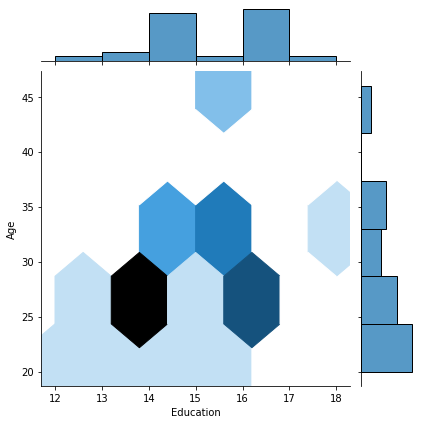

In [53]:
# Hex Scatterplot for customers Education and Age who rated less than 2 in Fitness rating
sns.jointplot(x='Education',y='Age',kind='hex',data=aerofit[aerofit.Fitness<3])
plt.show()

**Majority of the age and education density falls on 25-30 age group and 13-14 education**

<AxesSubplot:xlabel='Miles', ylabel='Income'>

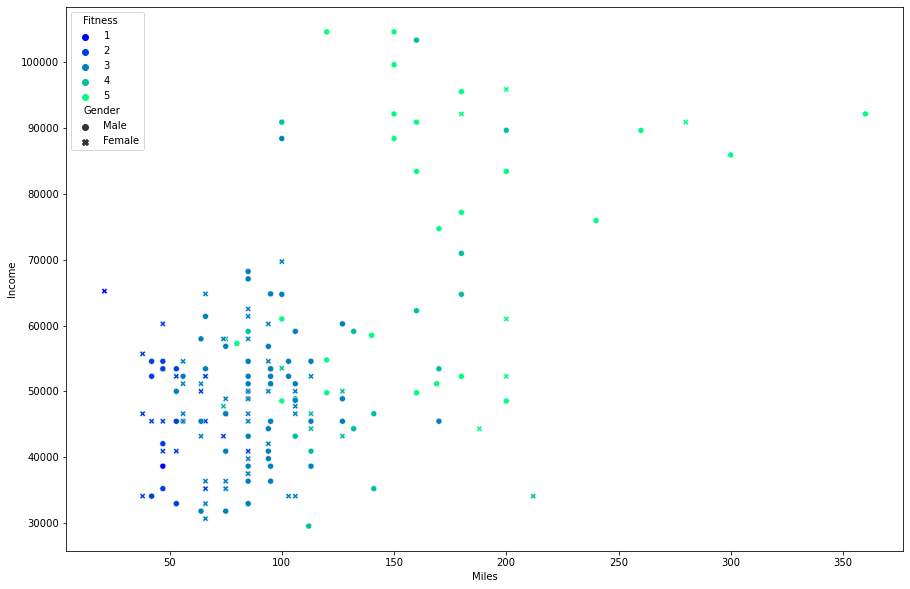

In [54]:
# Scatter Plot
plt.figure(figsize=(15,10))
sns.scatterplot(x='Miles',y='Income',data=aerofit,hue='Fitness',style='Gender',palette='winter')

* Above scattered Plot shows the overall picture over customer's income, how much they exercise (run/walk miles) given their gender and their fitness level.
* Most of the customer's fitness level is around 3 to 4 . and it says people who run more miles are having good fitness level.
* Though there is a trend with income and miles. But there are very few customers who earn a lot and run more miles.

<AxesSubplot:xlabel='Education', ylabel='Age'>

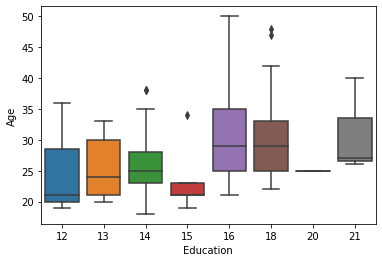

In [55]:
sns.boxplot(x='Education',y='Age',data=aerofit)

**Above box plot shows Education data against Age of the customer**

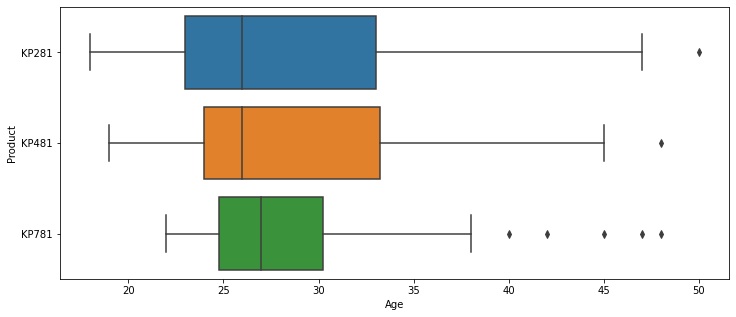

In [56]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Age',y='Product',data=aerofit)
plt.show()

* Roughly few customers with age above 40 use product KP781
* Most of the customers are comfortable with KP281 product type
* KP481 is the second highest popular product among the younger side of the customer

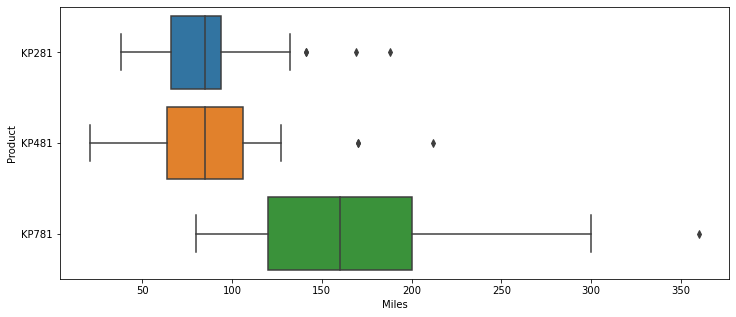

In [57]:
# Miles with each product
plt.figure(figsize=(12,5))
sns.boxplot(x='Miles',y='Product',data=aerofit)
plt.show()

* Customers with product KP781, has been able to cover more miles than other two product types
* KP481 product is the second most highest miles covering product among the customers
* KP281 product customer had covered less distance compared with other two product types

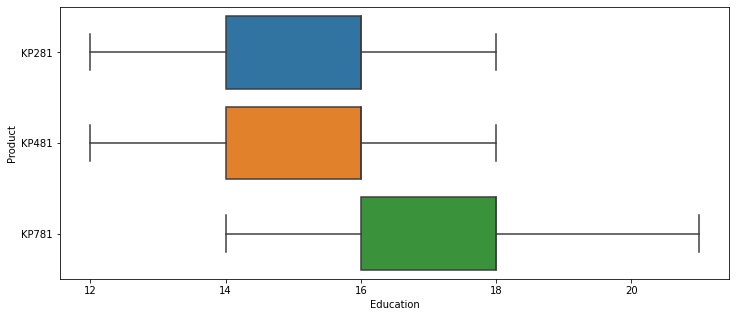

In [59]:
# Education of customers with each product purchased
plt.figure(figsize=(12,5))
sns.boxplot(x='Education',y='Product',data=aerofit)
plt.show()

* Customers with Higher education of 16 to 18 have preferred mostly product type KP781
* Customers with education between 14 to 16 prefer KP281 and KP481 equally

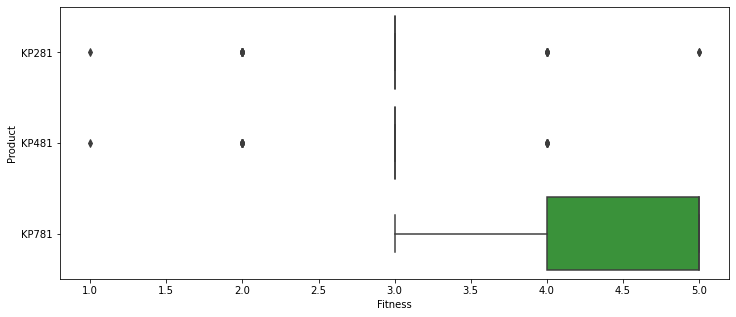

In [60]:
# Fitness of customer with each product
plt.figure(figsize=(12,5))
sns.boxplot(x='Fitness',y='Product',data=aerofit)
plt.show()

* Customers with **excellent shape** are significantly using **KP781** product type
**KP481 and KP281** product type are **scattered** across the fitness rating

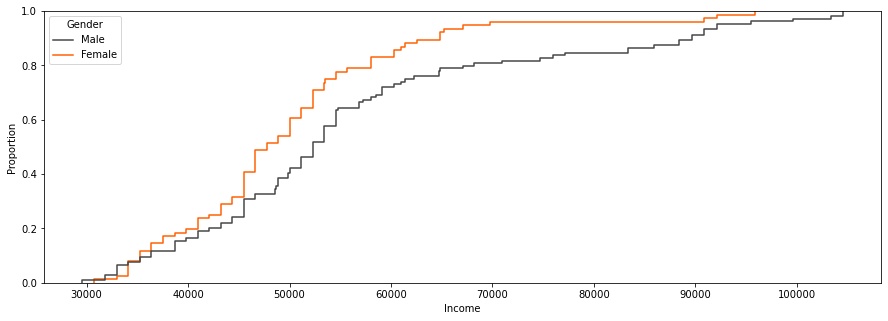

In [61]:
# Empirical Cumulative Distribution Function - proportional distribution for Income of customers against their Gender
plt.figure(figsize=(15,5))
sns.ecdfplot(data=aerofit,x='Income',hue='Gender',complementary=False,palette=['#454545','#FF6000'])
plt.show()

* Customers with minimum of 30K as annual income are the ones that are able to afford aerofit products
* Couple of Female customers less than 30K have also purchased aerofit product
* Male customers with Higher salaries are the most common purchasers of the product

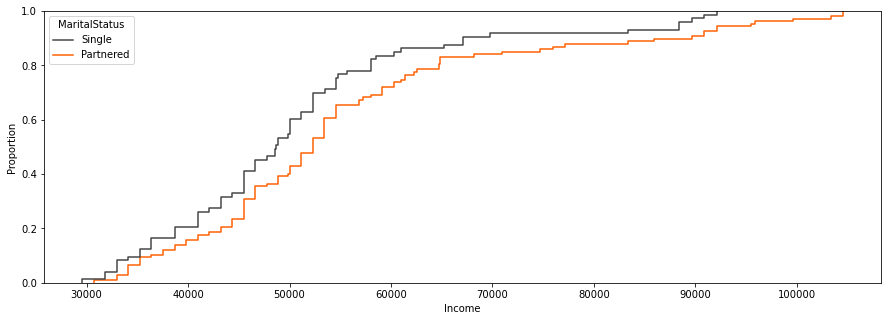

In [62]:
# Empirical Cumulative Distribution Function - proportional distribution for Income of customers against their Marital Status
plt.figure(figsize=(15,5))
sns.ecdfplot(data=aerofit,x='Income',hue='MaritalStatus',complementary=False,palette=['#454545','#FF6000'])
plt.show()

* Single customer have higher proportion than partnered customers
* Partnered customers are more than single customers and they also earn more than single customers

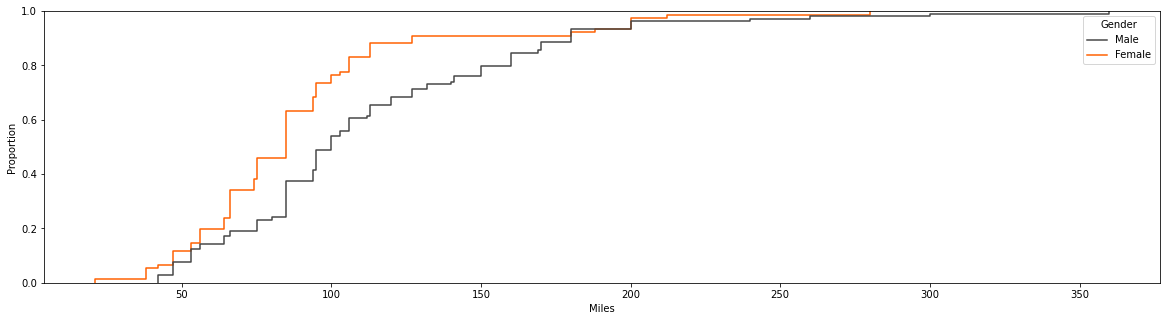

In [63]:
# Empirical Cumulative Distribution Function - proportional distribution for Miles of customers against their Gender
plt.figure(figsize=(20,5))
sns.ecdfplot(data=aerofit,x='Miles',hue='Gender',complementary=False,palette=['#454545','#FF6000'])
plt.show()

* Female customers proportion is higher than the male customers
* Male customers cover more miles than female customer with lower proportion than female customers

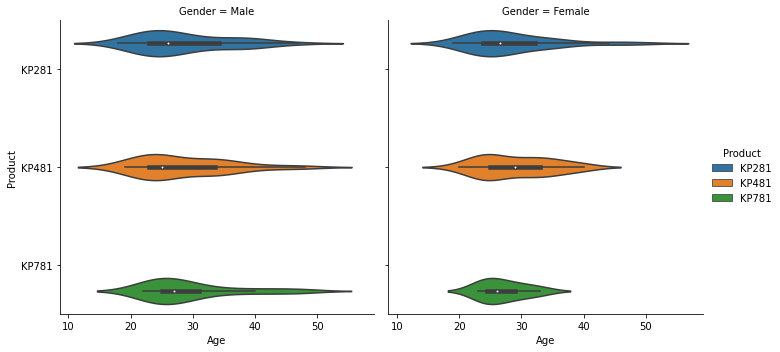

In [64]:
# Product used among age group seggregated by Gender
sns.catplot(x='Age',y='Product',hue='Product',col='Gender',data=aerofit,kind='violin')
plt.show()

* From the above catplot, male customers are equally distributed among the three product types
* Female customers tend to use product KP281 and KP481 more than advanced KP781 product
* Female customers tend to prefer less complicated products than their male counterparts

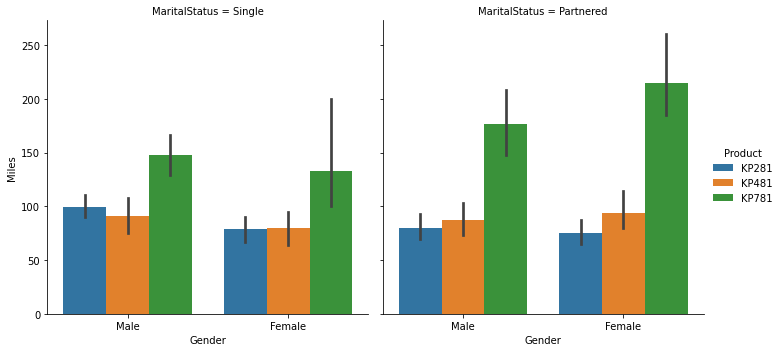

In [65]:
# Miles covered in each product by gender and their marital status
sns.catplot(x='Gender',y='Miles',hue='Product',col='MaritalStatus',data=aerofit,kind='bar')
plt.show()

* KP781 is more populat among the single and Partnered customers
* Among the both marital statuses, Single female does not prefer much of the products.
* Partnered Female bought KP781 treadmill compared to Partnered Male.
* Single Female customers bought KP281 treadmill slightly more compared to Single Male customers.
* Partnered Male customers bought KP281 treadmill slightly more than Single Male customers.
* There are more single Males buying treadmill than single Females.
* Single Male customers bought KP781 treadmill compared to single Female.
* Partnered customers are more than Single customers.

### Missing Value & Outlier Detection

In [67]:
aerofit.isna().sum()

Product             0
Age                 0
Gender              0
Education           0
MaritalStatus       0
Usage               0
Fitness             0
Income              0
Miles               0
Fitness_category    0
dtype: int64

No Null values found in any columns

In [68]:
aerofit.duplicated().sum()

0

No duplicates have been observed

### Business Insights based on Non-Graphical and Visual Analysis

In [69]:
aerofit.Product.value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

Probability of buying **KP281, KP481 & KP781 are 0.44, 0.33 & 0.22** respectively

In [70]:
aerofit.Gender.value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

* **Probability of Male customer is 0.57**
* **Probability of Female customer is 0.42**

In [71]:
aerofit.MaritalStatus.value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

* **Probability of Married/Partnered is 0.59**
* **Probability of Single is 0.40**

#### **Probability for each product for the both genders**

In [73]:
def gender_Probability(gender,aerofit):
    print(f"Prob P(KP781) for {gender}: {round(aerofit['KP781'][gender]/aerofit.loc[gender].sum(),3)}")
    print(f"Prob P(KP481) for {gender}: {round(aerofit['KP481'][gender]/aerofit.loc[gender].sum(),3)}")
    print(f"Prob P(KP281) for {gender}: {round(aerofit['KP281'][gender]/aerofit.loc[gender].sum(),3)}")
    
df_temp = pd.crosstab(index=aerofit['Gender'],columns=[aerofit['Product']])
print("Prob of Male: ",round(df_temp.loc['Male'].sum()/len(aerofit),3))
print("Prob of Female: ",round(df_temp.loc['Female'].sum()/len(aerofit),3))
print()
gender_Probability('Male',df_temp)
print()
gender_Probability('Female',df_temp)

Prob of Male:  0.578
Prob of Female:  0.422

Prob P(KP781) for Male: 0.317
Prob P(KP481) for Male: 0.298
Prob P(KP281) for Male: 0.385

Prob P(KP781) for Female: 0.092
Prob P(KP481) for Female: 0.382
Prob P(KP281) for Female: 0.526


#### **Probability of each product for given Marital Status**

In [74]:
def MS_Probability(ms_status,aerofit):
    print(f"Prob P(KP781) for {ms_status}: {round(aerofit['KP781'][ms_status]/aerofit.loc[ms_status].sum(),3)}")
    print(f"Prob P(KP481) for {ms_status}: {round(aerofit['KP481'][ms_status]/aerofit.loc[ms_status].sum(),3)}")
    print(f"Prob P(KP281) for {ms_status}: {round(aerofit['KP281'][ms_status]/aerofit.loc[ms_status].sum(),3)}")
    
df_temp = pd.crosstab(index=aerofit['MaritalStatus'],columns=[aerofit['Product']])
print("Prob of P(Single): ",round(df_temp.loc['Single'].sum()/len(aerofit),3))
print("Prob of P(Married/Partnered): ",round(df_temp.loc['Partnered'].sum()/len(aerofit),3))
print()
MS_Probability('Single',df_temp)
print()
MS_Probability('Partnered',df_temp)

Prob of P(Single):  0.406
Prob of P(Married/Partnered):  0.594

Prob P(KP781) for Single: 0.233
Prob P(KP481) for Single: 0.329
Prob P(KP281) for Single: 0.438

Prob P(KP781) for Partnered: 0.215
Prob P(KP481) for Partnered: 0.336
Prob P(KP281) for Partnered: 0.449


#### Customer Age Group Analysis

In [75]:
df_cat['age_group'] = df_cat.Age
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,18
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,19
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,19
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,19
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,20


In [78]:
# 0-21 -> Teen
# 22-35 -> Adult
# 36-45 -> Middle Age
# 46-60 -> Elder Age
df_cat.age_group = pd.cut(aerofit.age_group,bins=[0,21,35,45,60],labels=['Teen','Adult','Middle Aged','Elder'])

In [79]:
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,Teen
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,Teen
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,Teen
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,Teen
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,Teen


In [80]:
df_cat.age_group.value_counts()

Adult          135
Middle Aged     22
Teen            17
Elder            6
Name: age_group, dtype: int64

In [81]:
df_cat.loc[df_cat.Product=='KP281']["age_group"].value_counts()

Adult          56
Middle Aged    11
Teen           10
Elder           3
Name: age_group, dtype: int64

In [82]:
df_cat.loc[df_cat.Product=='KP481']["age_group"].value_counts()

Adult          45
Teen            7
Middle Aged     7
Elder           1
Name: age_group, dtype: int64

In [83]:
df_cat.loc[df_cat.Product=='KP781']["age_group"].value_counts()

Adult          34
Middle Aged     4
Elder           2
Teen            0
Name: age_group, dtype: int64

In [84]:
pd.crosstab(index=df_cat.Product,columns=df_cat.age_group,margins=True)

age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,10,56,11,3,80
KP481,7,45,7,1,60
KP781,0,34,4,2,40
All,17,135,22,6,180


In [85]:
# Conditional and Marginal Probabilities with product type and age group
np.round(pd.crosstab(index=aerofit.Product,columns=df_cat.age_group,normalize='columns',margins=True)*100,2)

age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,58.82,41.48,50.00,50.00,44.44
KP481,41.18,33.33,31.82,16.67,33.33
KP781,0.00,25.19,18.18,33.33,22.22


In [86]:
# Conditional and Marginal Probabilities with product type and age group
np.round(pd.crosstab(index=df_cat.Product,columns=df_cat.age_group,normalize=True,margins=True)*100,2)

age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,5.56,31.11,6.11,1.67,44.44
KP481,3.89,25.00,3.89,0.56,33.33
KP781,0.00,18.89,2.22,1.11,22.22
All,9.44,75.00,12.22,3.33,100.00


In [87]:
pd.crosstab(columns=df_cat["Fitness_category"],index=df_cat["Product"])

Fitness_category,Average Shape,Bad Shape,Excellent Shape,Good Shape,Poor Shape
Product,,,,,
KP281,54,14,2,9,1
KP481,39,12,0,8,1
KP781,4,0,29,7,0


In [88]:
round(pd.crosstab(index=df_cat["Product"],columns=df_cat["Fitness_category"],normalize="columns")*100,2)

Fitness_category,Average Shape,Bad Shape,Excellent Shape,Good Shape,Poor Shape
Product,,,,,
KP281,55.67,53.85,6.45,37.50,50.0
KP481,40.21,46.15,0.00,33.33,50.0
KP781,4.12,0.00,93.55,29.17,0.0


In [89]:
pd.crosstab(index=[df_cat.Product,df_cat.Fitness_category],columns=df_cat.Gender)

Gender                    Female  Male
Product Fitness_category              
KP281   Average Shape         26    28
        Bad Shape             10     4
        Excellent Shape        1     1
        Good Shape             3     6
        Poor Shape             0     1
KP481   Average Shape         18    21
        Bad Shape              6     6
        Good Shape             4     4
        Poor Shape             1     0
KP781   Average Shape          1     3
        Excellent Shape        5    24
        Good Shape             1     6

In [90]:
round(pd.crosstab(index=[df_cat.Product,df_cat.Fitness_category],columns=df_cat.Gender,normalize=True)*100,2)

Gender                    Female   Male
Product Fitness_category               
KP281   Average Shape      14.44  15.56
        Bad Shape           5.56   2.22
        Excellent Shape     0.56   0.56
        Good Shape          1.67   3.33
        Poor Shape          0.00   0.56
KP481   Average Shape      10.00  11.67
        Bad Shape           3.33   3.33
        Good Shape          2.22   2.22
        Poor Shape          0.56   0.00
KP781   Average Shape       0.56   1.67
        Excellent Shape     2.78  13.33
        Good Shape          0.56   3.33

In [91]:
round(pd.crosstab(index=[df_cat.Product,df_cat.MaritalStatus],columns=df_cat.Gender,normalize=True),2)

Gender                 Female  Male
Product MaritalStatus              
KP281   Partnered        0.15  0.12
        Single           0.07  0.11
KP481   Partnered        0.08  0.12
        Single           0.08  0.06
KP781   Partnered        0.02  0.11
        Single           0.02  0.08